# Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


# Load Datasets

In [2]:
df = pd.read_csv("../datasets/final_data/FIFA 1990-2018 - Cleaned.csv")
df_teams = pd.read_csv("../datasets/final_data/world_cup_comparisons.csv")
fifa_ranking = pd.read_csv("../datasets/final_data/fifa_ranking.csv")


In [3]:
df=df.replace({"South Korea":"Korea Republic"})
df = df.replace({"Iran":"IR Iran"})
df = df.replace({"Soviet Union":"Russia"})
df = df.replace({"Czechoslovakia":"Czech Republic"})


df_teams=df_teams.replace({"South Korea":"Korea Republic"})
df_teams = df_teams.replace({"Iran":"IR Iran"})

fifa_ranking=fifa_ranking.replace({"South Korea":"Korea Republic"})
fifa_ranking = fifa_ranking.replace({"Iran":"IR Iran"})
# fifa_ranking = fifa_ranking.replace({"Czech Republic":"Czechoslovakia"})



In [4]:
df.head()

,Team1,Team2,Rounds,Stadium,City,Time,Day,Month,Year,Score1,Score2,Remarks
0,Russia,Saudi Arabia,Group Phase,Luzhniki Stadium,Moscow,18:00,14,6,2018,5,0,NaN
1,Egypt,Uruguay,Group Phase,Ekaterinburg Arena,Ekaterinburg,17:00,15,6,2018,0,1,NaN
2,Morocco,IR Iran,Group Phase,Saint Petersburg Stadium,St. Petersburg,18:00,15,6,2018,0,1,NaN
3,Portugal,Spain,Group Phase,Fisht Stadium,Sochi,21:00,15,6,2018,3,3,{WinTeamName} win on aggregate after regular t...
4,France,Australia,Group Phase,Kazan Arena,Kazan,13:00,16,6,2018,2,1,NaN


# Duplicate

In [68]:

# we should change all respective column for duplicate
for index,row in df.iterrows():
    df.set_value(index+488,["Team1","Team2","Rounds","Stadium","City","Time","Day","Month","Year","Score1","Score2","Remarks"],[row["Team2"],row["Team1"],row["Rounds"],row['Stadium'],row['City'],row['Time'],row["Day"],row["Month"],row["Year"],row["Score2"],row["Score1"],row['Remarks']])
df.shape


/home/milad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  after removing the cwd from sys.path.


(976, 12)

In [6]:
df.iloc[487]

Team1              Germany
Team2            Argentina
Rounds              Finals
Stadium    Stadio Olimpico
City                  Rome
Time                 20:00
Day                      8
Month                    7
Year                  1990
Score1                   1
Score2                   0
Remarks                NaN
Name: 487, dtype: object

In [7]:
df.iloc[975]

Team1            Argentina
Team2              Germany
Rounds              Finals
Stadium    Stadio Olimpico
City                  Rome
Time                 20:00
Day                      8
Month                    7
Year                  1990
Score1                   0
Score2                   1
Remarks                NaN
Name: 975, dtype: object

# Ranking


In [8]:
fifa_ranking.head()

,rank,country_full,country_abrv,total_points,previous_points,rank_change,cur_year_avg,cur_year_avg_weighted,last_year_avg,last_year_avg_weighted,two_year_ago_avg,two_year_ago_weighted,three_year_ago_avg,three_year_ago_weighted,confederation,rank_date,Unnamed: 16
0,1,Germany,GER,0.0,57.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,NaN
1,2,Italy,ITA,0.0,57.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,NaN
2,3,Switzerland,SUI,0.0,50.0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,NaN
3,4,Sweden,SWE,0.0,55.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,UEFA,1993-08-08,NaN
4,5,Argentina,ARG,0.0,51.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CONMEBOL,1993-08-08,NaN


In [9]:
ranking_2018 = fifa_ranking[(fifa_ranking['rank_date']>"2018-04-01") & (fifa_ranking['rank_date']<"2018-05-01")]
ranking_2014 = fifa_ranking[(fifa_ranking['rank_date']>"2014-04-01") & (fifa_ranking['rank_date']<"2014-05-01")]
ranking_2010 = fifa_ranking[(fifa_ranking['rank_date']>"2010-04-01") & (fifa_ranking['rank_date']<"2010-05-01")]
ranking_2006 = fifa_ranking[(fifa_ranking['rank_date']>"2006-04-01") & (fifa_ranking['rank_date']<"2006-05-01")]
ranking_2002 = fifa_ranking[(fifa_ranking['rank_date']>"2002-03-01") & (fifa_ranking['rank_date']<"2002-04-01")]
ranking_1998 = fifa_ranking[(fifa_ranking['rank_date']>"1998-04-01") & (fifa_ranking['rank_date']<"1998-05-01")]
ranking_1994 = fifa_ranking[(fifa_ranking['rank_date']>"1994-04-01") & (fifa_ranking['rank_date']<"1994-05-01")]


In [10]:
ranking_2018.drop_duplicates(keep='last',inplace=True)
ranking_2014.drop_duplicates(keep='last',inplace=True) 
ranking_2010.drop_duplicates(keep='last',inplace=True) 
ranking_2006.drop_duplicates(keep='last',inplace=True) 
ranking_2002.drop_duplicates(keep='last',inplace=True) 
ranking_1998.drop_duplicates(keep='last',inplace=True) 
ranking_1994.drop_duplicates(keep='last',inplace=True)

/home/milad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/milad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/milad/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports unti

# add ranking to df

In [11]:
df.loc[df.Year == 2018,'rank_Team1'] = df['Team1'].map(ranking_2018.set_index('country_full')['rank'])
df.loc[df.Year == 2018,'rank_Team2'] = df['Team2'].map(ranking_2018.set_index('country_full')['rank'])

df.loc[df.Year == 2014,'rank_Team1'] = df['Team1'].map(ranking_2014.set_index('country_full')['rank'])
df.loc[df.Year == 2014,'rank_Team2'] = df['Team2'].map(ranking_2014.set_index('country_full')['rank'])

df.loc[df.Year == 2010,'rank_Team1'] = df['Team1'].map(ranking_2010.set_index('country_full')['rank'])
df.loc[df.Year == 2010,'rank_Team2'] = df['Team2'].map(ranking_2010.set_index('country_full')['rank'])

df.loc[df.Year == 2006,'rank_Team1'] = df['Team1'].map(ranking_2006.set_index('country_full')['rank'])
df.loc[df.Year == 2006,'rank_Team2'] = df['Team2'].map(ranking_2006.set_index('country_full')['rank'])

df.loc[df.Year == 2002,'rank_Team1'] = df['Team1'].map(ranking_2002.set_index('country_full')['rank'])
df.loc[df.Year == 2002,'rank_Team2'] = df['Team2'].map(ranking_2002.set_index('country_full')['rank'])

df.loc[df.Year == 1998,'rank_Team1'] = df['Team1'].map(ranking_1998.set_index('country_full')['rank'])
df.loc[df.Year == 1998,'rank_Team2'] = df['Team2'].map(ranking_1998.set_index('country_full')['rank'])

df.loc[df.Year == 1994,'rank_Team1'] = df['Team1'].map(ranking_1994.set_index('country_full')['rank'])
df.loc[df.Year == 1994,'rank_Team2'] = df['Team2'].map(ranking_1994.set_index('country_full')['rank'])

df.loc[df.Year == 1990,'rank_Team1'] = df['Team1'].map(ranking_1994.set_index('country_full')['rank'])
df.loc[df.Year == 1990,'rank_Team2'] = df['Team2'].map(ranking_1994.set_index('country_full')['rank'])

In [12]:
df.head()

,Team1,Team2,Rounds,Stadium,City,Time,Day,Month,Year,Score1,Score2,Remarks,rank_Team1,rank_Team2
0,Russia,Saudi Arabia,Group Phase,Luzhniki Stadium,Moscow,18:00,14.0,6.0,2018.0,5.0,0.0,NaN,66.0,70.0
1,Egypt,Uruguay,Group Phase,Ekaterinburg Arena,Ekaterinburg,17:00,15.0,6.0,2018.0,0.0,1.0,NaN,46.0,17.0
2,Morocco,IR Iran,Group Phase,Saint Petersburg Stadium,St. Petersburg,18:00,15.0,6.0,2018.0,0.0,1.0,NaN,42.0,36.0
3,Portugal,Spain,Group Phase,Fisht Stadium,Sochi,21:00,15.0,6.0,2018.0,3.0,3.0,{WinTeamName} win on aggregate after regular t...,4.0,8.0
4,France,Australia,Group Phase,Kazan Arena,Kazan,13:00,16.0,6.0,2018.0,2.0,1.0,NaN,7.0,40.0


In [13]:
df.isnull().sum()

Team1           0
Team2           0
Rounds          0
Stadium         0
City            0
Time            0
Day             0
Month           0
Year            0
Score1          0
Score2          0
Remarks       866
rank_Team1      0
rank_Team2      0
dtype: int64

In [14]:
df[df.rank_Team1.isnull()]

,Team1,Team2,Rounds,Stadium,City,Time,Day,Month,Year,Score1,Score2,Remarks,rank_Team1,rank_Team2


# Team Feature

In [15]:
df_teams.head()

,player,Year,team,goals_z,xg_z,crosses_z,boxtouches_z,passes_z,progpasses_z,takeons_z,progruns_z,tackles_z,interceptions_z,clearances_z,blocks_z,aerials_z,fouls_z,fouled_z,nsxg_z
0,Cristian Pavón,2018,Argentina,-0.38,-0.51,0.08,-0.25,-0.65,-0.74,-0.08,0.14,0.24,-0.77,-0.81,-0.44,-0.24,-0.40,-0.93,-0.60
1,Eduardo Salvio,2018,Argentina,-0.38,-0.48,-0.50,0.62,-0.03,-0.49,-0.08,0.46,0.52,0.59,0.32,-0.44,0.19,-1.12,0.62,-0.05
2,Enzo Pérez,2018,Argentina,-0.38,0.05,-0.50,-0.69,0.20,-0.68,-0.39,-0.35,0.28,-0.24,-0.81,-0.44,-0.89,0.68,0.00,-0.68
3,Federico Fazio,2018,Argentina,-0.38,-0.55,-0.50,-0.69,-1.00,-0.93,-0.70,-0.84,-0.80,-0.77,-0.65,-0.44,0.19,-1.12,-0.62,-0.79
4,Franco Armani,2018,Argentina,-0.38,-0.55,-0.50,-0.80,-0.70,0.60,-0.70,-0.68,-0.80,-0.77,-0.65,-0.44,-0.89,-1.12,-0.93,-0.79


In [16]:
df.shape

(976, 14)

In [17]:
features=[]
for key in df_teams.keys():
    features.append(str(key))

In [18]:
features

['player',
 'Year',
 'team',
 'goals_z',
 'xg_z',
 'crosses_z',
 'boxtouches_z',
 'passes_z',
 'progpasses_z',
 'takeons_z',
 'progruns_z',
 'tackles_z',
 'interceptions_z',
 'clearances_z',
 'blocks_z',
 'aerials_z',
 'fouls_z',
 'fouled_z',
 'nsxg_z']

In [19]:
del features[0:4]

In [20]:
features

['xg_z',
 'crosses_z',
 'boxtouches_z',
 'passes_z',
 'progpasses_z',
 'takeons_z',
 'progruns_z',
 'tackles_z',
 'interceptions_z',
 'clearances_z',
 'blocks_z',
 'aerials_z',
 'fouls_z',
 'fouled_z',
 'nsxg_z']

In [21]:
df_teams_avg = df_teams.groupby(['Year','team'])['goals_z'].sum()/df_teams.groupby(['Year','team'])['goals_z'].size()
df_teams_avg = df_teams_avg.to_frame()

In [22]:
df_teams_avg['Year'] = df_teams_avg.index.get_level_values(0).tolist()
df_teams_avg['team'] = df_teams_avg.index.get_level_values(1).tolist()


In [23]:
df_teams_avg.head()

goals_z  Year       team
Year team                                
1966 Argentina  0.049167  1966  Argentina
     Brazil    -0.038000  1966     Brazil
     Bulgaria  -0.280000  1966   Bulgaria
     Chile     -0.139286  1966      Chile
     England    0.221333  1966    England

In [24]:
def avg_team(feature,df_teams_avg):
    a=df_teams.groupby(['Year','team'])[feature].sum()/df_teams.groupby(['Year','team'])[feature].size()
    b=a.to_frame()
    df_teams_avg[feature]= b[feature]
    

In [25]:
for feature in features:
    avg_team(feature,df_teams_avg)

In [26]:
df_teams_avg.head()

goals_z  Year       team      xg_z  crosses_z  boxtouches_z  \
Year team                                                                      
1966 Argentina  0.049167  1966  Argentina  0.021667  -0.440833     -0.138333   
     Brazil    -0.038000  1966     Brazil -0.185500  -0.249500     -0.097000   
     Bulgaria  -0.280000  1966   Bulgaria -0.206875  -0.335000     -0.199375   
     Chile     -0.139286  1966      Chile  0.160714  -0.050000      0.007857   
     England    0.221333  1966    England  0.016000   0.424000      0.221333   

                passes_z  progpasses_z  takeons_z  progruns_z  tackles_z  \
Year team                                                                  
1966 Argentina  0.836667      0.265000   0.621667    0.572500   0.090000   
     Brazil    -0.145500     -0.179000   0.139500   -0.237500   0.017000   
     Bulgaria  -0.128125     -0.018125   0.344375   -0.025000  -0.235000   
     Chile      0.515714      0.370714   0.130714    0.074286   0.407143   
     England    0.019333     -0.035333   0.048667    0.274667  -0.225333   

                interceptions_z  clearances_z  blocks_z  aerials_z   fouls_z  \
Year team                                                                      
1966 Argentina         0.501667      0.219167 -0.064167  -0.134167  0.522500   
     Brazil            0.039000     -0.275500 -0.229000  -0.255500 -0.141500   
     Bulgaria         -0.583125     -0.096250 -0.108125  -0.302500 -0.072500   
     Chile             0.215714     -0.045714  0.260000  -0.259286  0.090000   
     England          -0.218667      0.046667  0.160667   0.450000  0.189333   

                fouled_z    nsxg_z  
Year team                           
1966 Argentina  0.565833 -0.110833  
     Brazil    -0.240500 -0.016500  
     Bulgaria   0.029375 -0.013750  
     Chile      0.104286  0.019286  
     England   -0.310667  0.136000

In [27]:
new_df = pd.merge(df, df_teams_avg,  how='left', left_on=['Team1','Year'], right_on = ['team','Year'])
new_df1 = pd.merge(new_df,df_teams_avg ,  how='left', left_on=['Team2','Year'], right_on = ['team','Year'])


In [28]:
new_df1.head()

,Team1,Team2,Rounds,Stadium,City,Time,Day,Month,Year,Score1,...,takeons_z_y,progruns_z_y,tackles_z_y,interceptions_z_y,clearances_z_y,blocks_z_y,aerials_z_y,fouls_z_y,fouled_z_y,nsxg_z_y
0,Russia,Saudi Arabia,Group Phase,Luzhniki Stadium,Moscow,18:00,14.0,6.0,2018,5.0,...,-0.136316,0.073684,0.512632,0.126316,-0.246316,0.209474,-0.466316,-0.387368,0.051579,-0.294211
1,Egypt,Uruguay,Group Phase,Ekaterinburg Arena,Ekaterinburg,17:00,15.0,6.0,2018,0.0,...,-0.080625,0.025000,-0.043750,0.891875,0.015000,-0.056250,-0.066875,-0.130000,0.116250,0.041875
2,Morocco,IR Iran,Group Phase,Saint Petersburg Stadium,St. Petersburg,18:00,15.0,6.0,2018,0.0,...,-0.106250,-0.435625,-0.701250,-0.608750,0.289375,-0.327500,-0.082500,0.200000,0.236250,-0.388125
3,Portugal,Spain,Group Phase,Fisht Stadium,Sochi,21:00,15.0,6.0,2018,3.0,...,0.428235,0.800000,0.513529,0.456471,-0.374706,-0.008824,-0.140000,-0.400000,0.145882,0.644706
4,France,Australia,Group Phase,Kazan Arena,Kazan,13:00,16.0,6.0,2018,2.0,...,0.097333,-0.029333,0.031333,-0.022667,0.221333,-0.341333,0.240667,0.096000,-0.071333,0.004000


In [29]:
new_df1.iloc[0]

Team1                          Russia
Team2                    Saudi Arabia
Rounds                    Group Phase
Stadium              Luzhniki Stadium
City                           Moscow
Time                            18:00
Day                                14
Month                               6
Year                             2018
Score1                              5
Score2                              0
Remarks                           NaN
rank_Team1                         66
rank_Team2                         70
goals_z_x                       0.315
team_x                         Russia
xg_z_x                      -0.104375
crosses_z_x                 -0.033125
boxtouches_z_x               -0.06875
passes_z_x                  -0.315625
progpasses_z_x              -0.049375
takeons_z_x                 -0.176875
progruns_z_x                -0.159375
tackles_z_x                    -0.375
interceptions_z_x            -0.12875
clearances_z_x               0.246875
blocks_z_x  

In [30]:
df =new_df1

In [31]:
df.isnull().sum()

Team1                  0
Team2                  0
Rounds                 0
Stadium                0
City                   0
Time                   0
Day                    0
Month                  0
Year                   0
Score1                 0
Score2                 0
Remarks              866
rank_Team1             0
rank_Team2             0
goals_z_x             49
team_x                49
xg_z_x                49
crosses_z_x           49
boxtouches_z_x        49
passes_z_x            49
progpasses_z_x        49
takeons_z_x           49
progruns_z_x          49
tackles_z_x           49
interceptions_z_x     49
clearances_z_x        49
blocks_z_x            49
aerials_z_x           49
fouls_z_x             49
fouled_z_x            49
nsxg_z_x              49
goals_z_y             49
team_y                49
xg_z_y                49
crosses_z_y           49
boxtouches_z_y        49
passes_z_y            49
progpasses_z_y        49
takeons_z_y           49
progruns_z_y          49


In [32]:
df[df.goals_z_x.isnull()]

,Team1,Team2,Rounds,Stadium,City,Time,Day,Month,Year,Score1,...,takeons_z_y,progruns_z_y,tackles_z_y,interceptions_z_y,clearances_z_y,blocks_z_y,aerials_z_y,fouls_z_y,fouled_z_y,nsxg_z_y
71,Côte dIvoire,Japan,Group Phase,Arena Pernambuco,Recife,22:00,14.0,6.0,2014,2.0,...,-0.032500,0.193125,0.126250,0.408125,-0.117500,0.291250,0.062500,0.198750,0.220000,0.388125
140,Côte dIvoire,Portugal,Group Phase,Port Elizabeth Stadium,Nelson Mandela Bay/Port Elizabeth,16:00,15.0,6.0,2010,0.0,...,-0.112105,-0.125263,-0.065263,-0.139474,-0.140526,-0.231053,-0.202105,-0.135263,-0.224737,-0.141579
173,Korea DPR,Côte dIvoire,Group Phase,Mbombela Stadium,Nelspruit,16:00,25.0,6.0,2010,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
197,Serbia and Montenegro,Netherlands,Group Phase,Zentralstadion,Leipzig,15:00,11.0,6.0,2006,0.0,...,-0.016667,0.358889,0.312778,0.232222,0.113889,0.202222,-0.145000,0.228333,-0.222222,-0.138889
231,Côte dIvoire,Serbia and Montenegro,Group Phase,"FIFA World Cup Stadium, Munich",Munich,21:00,21.0,6.0,2006,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
258,Republic of Ireland,Cameroon,Group Phase,Niigata Stadium Big Swan,Niigata,15:30,1.0,6.0,2002,1.0,...,0.401538,0.588462,0.070000,0.294615,0.052308,0.649231,0.263846,0.389231,0.226154,0.417692
412,Republic of Ireland,Norway,Group Phase,Giants Stadium,New York/New Jersey,12:30,28.0,6.0,1994,0.0,...,-0.360625,-0.429375,-0.555625,-0.535625,0.480000,-0.073750,0.713750,0.516875,-0.267500,-0.065625
437,Russia,Romania,Group Phase,Stadio San Nicola,Bari,17:00,9.0,6.0,1990,0.0,...,0.632667,0.900000,0.600000,0.604667,-0.006000,0.158667,-0.301333,-0.016667,0.205333,-0.150000
442,Germany,Yugoslavia,Group Phase,Giuseppe Meazza,Milan,21:00,10.0,6.0,1990,4.0,...,0.145882,0.278824,-0.247647,-0.122941,-0.015294,0.082353,-0.266471,-0.277059,0.109412,0.030000
453,Mexico,Republic of Ireland,Group Phase,Stadio Giuseppe Meazza,Milan,21:00,15.0,6.0,1990,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.head()

,Team1,Team2,Rounds,Stadium,City,Time,Day,Month,Year,Score1,...,takeons_z_y,progruns_z_y,tackles_z_y,interceptions_z_y,clearances_z_y,blocks_z_y,aerials_z_y,fouls_z_y,fouled_z_y,nsxg_z_y
0,Russia,Saudi Arabia,Group Phase,Luzhniki Stadium,Moscow,18:00,14.0,6.0,2018,5.0,...,-0.136316,0.073684,0.512632,0.126316,-0.246316,0.209474,-0.466316,-0.387368,0.051579,-0.294211
1,Egypt,Uruguay,Group Phase,Ekaterinburg Arena,Ekaterinburg,17:00,15.0,6.0,2018,0.0,...,-0.080625,0.025000,-0.043750,0.891875,0.015000,-0.056250,-0.066875,-0.130000,0.116250,0.041875
2,Morocco,IR Iran,Group Phase,Saint Petersburg Stadium,St. Petersburg,18:00,15.0,6.0,2018,0.0,...,-0.106250,-0.435625,-0.701250,-0.608750,0.289375,-0.327500,-0.082500,0.200000,0.236250,-0.388125
3,Portugal,Spain,Group Phase,Fisht Stadium,Sochi,21:00,15.0,6.0,2018,3.0,...,0.428235,0.800000,0.513529,0.456471,-0.374706,-0.008824,-0.140000,-0.400000,0.145882,0.644706
4,France,Australia,Group Phase,Kazan Arena,Kazan,13:00,16.0,6.0,2018,2.0,...,0.097333,-0.029333,0.031333,-0.022667,0.221333,-0.341333,0.240667,0.096000,-0.071333,0.004000


# Index the Rounds

In [34]:
rounds = df.Rounds
rounds.unique()
rounds_dict = {"Group Phase":1, "Round of 16":2, "Quarter Finals":3, "Semi Finals":4, "Play-off for third place":5, "Finals":6}
rounds_encoded = []

for i in range(len(df)):
    rounds_encoded.append(rounds_dict[list(df.Rounds)[i]])
    
df["Rounds"] = rounds_encoded

In [35]:
countries = list(set(df["Team1"]).union(set(df["Team2"])))
countries_dict = {}
for i in range(len(countries)):
    countries_dict[countries[i]] = i
    
Team1_encoded = []
Team2_encoded = []

for i in range(len(df)):
    Team1_encoded.append(countries_dict[list(df.Team1)[i]])
    Team2_encoded.append(countries_dict[list(df.Team2)[i]])
    
df["Team1"] = Team1_encoded
df["Team2"] = Team2_encoded

In [36]:
#Adding who is the winner 
winner = []
for i in range (len(df['Team1'])):
    if df['Score1'][i] > df['Score2'][i]:
        winner.append(df['Team1'][i])
    elif df['Score1'][i] < df['Score2'][i]:
        winner.append(df['Team2'][i])
    else:
        winner.append(68)
df['winning_team'] = winner

df.head()

,Team1,Team2,Rounds,Stadium,City,Time,Day,Month,Year,Score1,...,progruns_z_y,tackles_z_y,interceptions_z_y,clearances_z_y,blocks_z_y,aerials_z_y,fouls_z_y,fouled_z_y,nsxg_z_y,winning_team
0,17,21,1,Luzhniki Stadium,Moscow,18:00,14.0,6.0,2018,5.0,...,0.073684,0.512632,0.126316,-0.246316,0.209474,-0.466316,-0.387368,0.051579,-0.294211,17
1,37,18,1,Ekaterinburg Arena,Ekaterinburg,17:00,15.0,6.0,2018,0.0,...,0.025000,-0.043750,0.891875,0.015000,-0.056250,-0.066875,-0.130000,0.116250,0.041875,18
2,34,7,1,Saint Petersburg Stadium,St. Petersburg,18:00,15.0,6.0,2018,0.0,...,-0.435625,-0.701250,-0.608750,0.289375,-0.327500,-0.082500,0.200000,0.236250,-0.388125,7
3,19,25,1,Fisht Stadium,Sochi,21:00,15.0,6.0,2018,3.0,...,0.800000,0.513529,0.456471,-0.374706,-0.008824,-0.140000,-0.400000,0.145882,0.644706,68
4,47,50,1,Kazan Arena,Kazan,13:00,16.0,6.0,2018,2.0,...,-0.029333,0.031333,-0.022667,0.221333,-0.341333,0.240667,0.096000,-0.071333,0.004000,47


In [37]:
df.isnull().sum()

Team1                  0
Team2                  0
Rounds                 0
Stadium                0
City                   0
Time                   0
Day                    0
Month                  0
Year                   0
Score1                 0
Score2                 0
Remarks              866
rank_Team1             0
rank_Team2             0
goals_z_x             49
team_x                49
xg_z_x                49
crosses_z_x           49
boxtouches_z_x        49
passes_z_x            49
progpasses_z_x        49
takeons_z_x           49
progruns_z_x          49
tackles_z_x           49
interceptions_z_x     49
clearances_z_x        49
blocks_z_x            49
aerials_z_x           49
fouls_z_x             49
fouled_z_x            49
nsxg_z_x              49
goals_z_y             49
team_y                49
xg_z_y                49
crosses_z_y           49
boxtouches_z_y        49
passes_z_y            49
progpasses_z_y        49
takeons_z_y           49
progruns_z_y          49


In [38]:
df = df.dropna(axis=0, subset=['goals_z_x','goals_z_y'])
df.isnull().sum()

Team1                  0
Team2                  0
Rounds                 0
Stadium                0
City                   0
Time                   0
Day                    0
Month                  0
Year                   0
Score1                 0
Score2                 0
Remarks              790
rank_Team1             0
rank_Team2             0
goals_z_x              0
team_x                 0
xg_z_x                 0
crosses_z_x            0
boxtouches_z_x         0
passes_z_x             0
progpasses_z_x         0
takeons_z_x            0
progruns_z_x           0
tackles_z_x            0
interceptions_z_x      0
clearances_z_x         0
blocks_z_x             0
aerials_z_x            0
fouls_z_x              0
fouled_z_x             0
nsxg_z_x               0
goals_z_y              0
team_y                 0
xg_z_y                 0
crosses_z_y            0
boxtouches_z_y         0
passes_z_y             0
progpasses_z_y         0
takeons_z_y            0
progruns_z_y           0


In [39]:
df.shape

(890, 49)

In [40]:
df.Team1.max()

67

In [41]:
df.groupby(['Time']).size()

Time
11:30      2
12:00      8
12:30     24
13:00     50
13:30     20
14:30     16
15:00     30
15:30     44
16:00    138
16:30     20
17:00     88
17:30     26
18:00     78
18:30      2
19:00     12
19:30     20
20:00     20
20:30    102
21:00    190
dtype: int64

In [42]:
# df['Time_code'] = df['Time'].map({'11:30':0,'12:00':1,'12:30':2,'13:00':3,'13:30':4,'14:30':5,
# '15:00':6,'15:30':7,'16:00':8,'16:30':9,'17:00':10,'17:30':11,'18:00':12,'18:30':13,'19:00':14,'19:30':15,
# '20:00':16,'20:30':17,'21:00':18})

In [43]:
df.head()

,Team1,Team2,Rounds,Stadium,City,Time,Day,Month,Year,Score1,...,progruns_z_y,tackles_z_y,interceptions_z_y,clearances_z_y,blocks_z_y,aerials_z_y,fouls_z_y,fouled_z_y,nsxg_z_y,winning_team
0,17,21,1,Luzhniki Stadium,Moscow,18:00,14.0,6.0,2018,5.0,...,0.073684,0.512632,0.126316,-0.246316,0.209474,-0.466316,-0.387368,0.051579,-0.294211,17
1,37,18,1,Ekaterinburg Arena,Ekaterinburg,17:00,15.0,6.0,2018,0.0,...,0.025000,-0.043750,0.891875,0.015000,-0.056250,-0.066875,-0.130000,0.116250,0.041875,18
2,34,7,1,Saint Petersburg Stadium,St. Petersburg,18:00,15.0,6.0,2018,0.0,...,-0.435625,-0.701250,-0.608750,0.289375,-0.327500,-0.082500,0.200000,0.236250,-0.388125,7
3,19,25,1,Fisht Stadium,Sochi,21:00,15.0,6.0,2018,3.0,...,0.800000,0.513529,0.456471,-0.374706,-0.008824,-0.140000,-0.400000,0.145882,0.644706,68
4,47,50,1,Kazan Arena,Kazan,13:00,16.0,6.0,2018,2.0,...,-0.029333,0.031333,-0.022667,0.221333,-0.341333,0.240667,0.096000,-0.071333,0.004000,47


# train & test

In [44]:
df = df.drop(['Score1','Score2','Remarks',"Stadium","City",'team_x','team_y'],axis=1)
df = df.fillna(0)
df.head()

,Team1,Team2,Rounds,Time,Day,Month,Year,rank_Team1,rank_Team2,goals_z_x,...,progruns_z_y,tackles_z_y,interceptions_z_y,clearances_z_y,blocks_z_y,aerials_z_y,fouls_z_y,fouled_z_y,nsxg_z_y,winning_team
0,17,21,1,18:00,14.0,6.0,2018.0,66.0,70.0,0.315000,...,0.073684,0.512632,0.126316,-0.246316,0.209474,-0.466316,-0.387368,0.051579,-0.294211,17
1,37,18,1,17:00,15.0,6.0,2018.0,46.0,17.0,-0.148750,...,0.025000,-0.043750,0.891875,0.015000,-0.056250,-0.066875,-0.130000,0.116250,0.041875,18
2,34,7,1,18:00,15.0,6.0,2018.0,42.0,36.0,-0.264375,...,-0.435625,-0.701250,-0.608750,0.289375,-0.327500,-0.082500,0.200000,0.236250,-0.388125,7
3,19,25,1,21:00,15.0,6.0,2018.0,4.0,8.0,0.110000,...,0.800000,0.513529,0.456471,-0.374706,-0.008824,-0.140000,-0.400000,0.145882,0.644706,68
4,47,50,1,13:00,16.0,6.0,2018.0,7.0,40.0,0.037000,...,-0.029333,0.031333,-0.022667,0.221333,-0.341333,0.240667,0.096000,-0.071333,0.004000,47


In [45]:
X_train = df.loc[(df['Year']!= 2018) | ((df['Year'] == 2018) & (df['Rounds'] ==1))]
X_test  = df.loc[(df['Year'] == 2018) & (df['Rounds'] != 1)]

In [46]:
y_train =  X_train["winning_team"]
y_test  =  X_test["winning_team"]

In [47]:
X_train.head()


,Team1,Team2,Rounds,Time,Day,Month,Year,rank_Team1,rank_Team2,goals_z_x,...,progruns_z_y,tackles_z_y,interceptions_z_y,clearances_z_y,blocks_z_y,aerials_z_y,fouls_z_y,fouled_z_y,nsxg_z_y,winning_team
0,17,21,1,18:00,14.0,6.0,2018.0,66.0,70.0,0.315000,...,0.073684,0.512632,0.126316,-0.246316,0.209474,-0.466316,-0.387368,0.051579,-0.294211,17
1,37,18,1,17:00,15.0,6.0,2018.0,46.0,17.0,-0.148750,...,0.025000,-0.043750,0.891875,0.015000,-0.056250,-0.066875,-0.130000,0.116250,0.041875,18
2,34,7,1,18:00,15.0,6.0,2018.0,42.0,36.0,-0.264375,...,-0.435625,-0.701250,-0.608750,0.289375,-0.327500,-0.082500,0.200000,0.236250,-0.388125,7
3,19,25,1,21:00,15.0,6.0,2018.0,4.0,8.0,0.110000,...,0.800000,0.513529,0.456471,-0.374706,-0.008824,-0.140000,-0.400000,0.145882,0.644706,68
4,47,50,1,13:00,16.0,6.0,2018.0,7.0,40.0,0.037000,...,-0.029333,0.031333,-0.022667,0.221333,-0.341333,0.240667,0.096000,-0.071333,0.004000,47


In [48]:
X_train = X_train.drop(["Rounds","winning_team","Time"],axis=1)
X_test = X_test.drop(["Rounds","winning_team","Time"],axis=1)

In [49]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

# XGboost

In [50]:
import xgboost as xgb

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [51]:
import xgboost as xgb
from sklearn.datasets import dump_svmlight_file

dump_svmlight_file(X_train, y_train, 'dtrain.svm', zero_based=True)
dump_svmlight_file(X_test, y_test, 'dtest.svm', zero_based=True)
dtrain_svm = xgb.DMatrix('dtrain.svm')
dtest_svm = xgb.DMatrix('dtest.svm')

[20:20:57] 858x39 matrix with 33462 entries loaded from dtrain.svm
[20:20:57] 32x39 matrix with 1248 entries loaded from dtest.svm


In [52]:
param = {
    'max_depth': 50,  # the maximum depth of each tree
    'eta': 0.005,  # the training step for each iteration
    'silent': 1,  # logging mode - quiet
    'objective': 'multi:softprob',  # error evaluation for multiclass training
    'num_class': 69}  # the number of classes that exist in this datset
num_round = 1000  # the number of training iterations

In [53]:
bst = xgb.train(param, dtrain, num_round)
preds = bst.predict(dtest)

In [54]:
import numpy as np
best_preds = np.asarray([np.argmax(line) for line in preds])


In [55]:
from sklearn.metrics import precision_score

print(accuracy_score(y_test, best_preds))

0.46875


# NEW

# SVM

In [56]:
from sklearn import svm
model_svm = svm.SVC()
model_svm.fit(X_train,y_train)

y_pred_svm = model_svm.predict(X_test)

accuracy_score(y_test, y_pred_svm)

0.3125

# Decision Tree

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model_tree= DecisionTreeClassifier()
model_tree.fit(X_train,y_train)

y_pred_tree = model_tree.predict(X_test)

accuracy_score(y_test, y_pred_tree)

0.3125

# KNN

In [58]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

y_pred_knn = neigh.predict(X_test)

accuracy_score(y_test, y_pred_knn)

0.1875

# NN

In [59]:
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
#model.dropout()
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) #categorical crossentropy?

hist = model.fit(X_train, y_train, validation_data=(X_test,y_test), shuffle=True, epochs=100, batch_size=2)

Train on 858 samples, validate on 32 samples
Epoch 1/100
858/858 [==============================] - 2s 2ms/step - loss: -118.5387 - acc: 0.0000e+00 - val_loss: -195.7589 - val_acc: 0.0000e+00
Epoch 2/100
858/858 [==============================] - 1s 876us/step - loss: -297.8622 - acc: 0.0000e+00 - val_loss: -348.7030 - val_acc: 0.0000e+00
Epoch 3/100
858/858 [==============================] - 1s 863us/step - loss: -450.3712 - acc: 0.0000e+00 - val_loss: -485.2870 - val_acc: 0.0000e+00
Epoch 4/100
858/858 [==============================] - 1s 853us/step - loss: -594.5403 - acc: 0.0000e+00 - val_loss: -628.7278 - val_acc: 0.0000e+00
Epoch 5/100
858/858 [==============================] - 1s 878us/step - loss: -677.5328 - acc: 0.0000e+00 - val_loss: -628.7278 - val_acc: 0.0000e+00
Epoch 6/100
858/858 [==============================] - 1s 876us/step - loss: -677.5328 - acc: 0.0000e+00 - val_loss: -628.7278 - val_acc: 0.0000e+00
Epoch 7/100
858/858 [==============================] - 1s 842us

In [62]:
scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

32/32 [==============================] - 0s 142us/step

acc: 0.00%


['seaborn-pastel', 'fivethirtyeight', 'classic', 'seaborn', 'tableau-colorblind10', 'dark_background', 'fast', 'seaborn-talk', 'seaborn-colorblind', 'Solarize_Light2', 'seaborn-dark', 'bmh', 'grayscale', 'seaborn-darkgrid', '_classic_test', 'seaborn-paper', 'seaborn-ticks', 'seaborn-bright', 'seaborn-notebook', 'seaborn-muted', 'seaborn-whitegrid', 'seaborn-deep', 'seaborn-poster', 'seaborn-dark-palette', 'ggplot', 'seaborn-white']


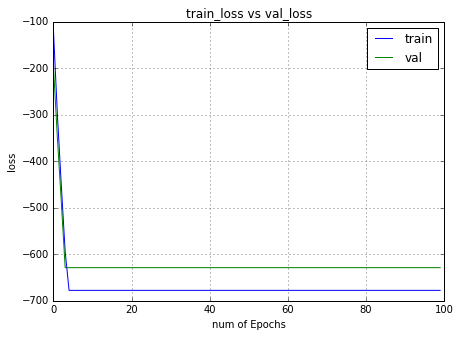

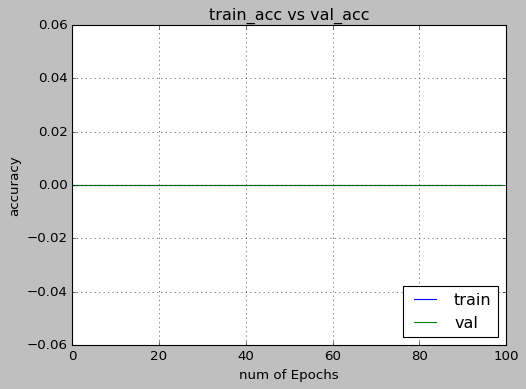

In [63]:
# Plot the results
import matplotlib.pyplot as plt
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc=hist.history['acc']
val_acc=hist.history['val_acc']
xc=range(100)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print (plt.style.available) # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)
#print plt.style.available # use bmh, classic,ggplot for big pictures
plt.style.use(['classic'])
plt.show()